Version 2023.12.29 - A. Lundervold

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MMIV-ML/ELMED219/blob/main/Lab0-ML/Lab0-GT-and-complex-network-analysis/5-Network-analysis-centrality.ipynb)

# 5. Network analysis: centrality measures

### Check if Colab

In [1]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# as that makes some difference for the code below.
# We'll do this in every notebook of the course.

try:
    import google.colab
    # If this statement executes without error, you're in a Colab environment.
    is_colab = True
    print("Running in Google Colab.")
except ImportError:
    # An ImportError means you're not in a Colab environment.
    is_colab = False
    print("Not running in Google Colab.")

Not running in Google Colab.


Import modules

In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

Here, we want to assign a value of relevance or importance to each node relative to the network.

In order to do that, there are many centrality metrics that focus in different properties of the network to provide a degree of importance or centrality.

To illustrate each centrality measure, we will use Florentine families network [1].

Loading example from NetworkX:

In [16]:
G = nx.florentine_families_graph()
bw_centrality = nx.betweenness_centrality(G, normalized=True)

Defining position of nodes based on "spring" layout:

In [17]:
pos = nx.spring_layout(G, iterations=50, seed=0)

Visualization of families network:

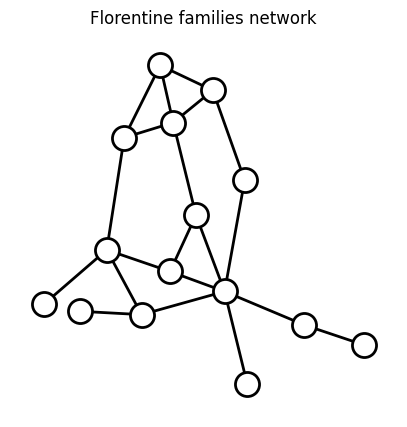

In [18]:
fig, axs = plt.subplots(figsize=(5,5), facecolor='w', nrows=1, ncols=1) #, gridspec_kw={'width_ratios': [1.5, 1]})
sc = nx.draw_networkx_nodes(G, pos, node_color='white', linewidths=2, edgecolors='k', ax=axs)
nx.draw_networkx_edges(G, pos, width=2, ax=axs); axs.axis('off')
_ = axs.set_title("Florentine families network", fontsize=12)

## 5.1. Centrality measures

### 5.1.1. Degree centrality

The degree centrality of a node correspond to the amount of connections that it has. The higher the degree the more important the node is [2].

In networkx, we can get the degree centrality using the method `nx.degree_centrality(G)`, with `G` the Graph.

In [19]:
nx.degree_centrality(G)

{'Acciaiuoli': 0.07142857142857142,
 'Medici': 0.42857142857142855,
 'Castellani': 0.21428571428571427,
 'Peruzzi': 0.21428571428571427,
 'Strozzi': 0.2857142857142857,
 'Barbadori': 0.14285714285714285,
 'Ridolfi': 0.21428571428571427,
 'Tornabuoni': 0.21428571428571427,
 'Albizzi': 0.21428571428571427,
 'Salviati': 0.14285714285714285,
 'Pazzi': 0.07142857142857142,
 'Bischeri': 0.21428571428571427,
 'Guadagni': 0.2857142857142857,
 'Ginori': 0.07142857142857142,
 'Lamberteschi': 0.07142857142857142}

It returns a `dict`-like object. Its `keys` correspond to the name of the family (node property) and their `values` correspond to the amount of edges or connections that each node. This value is normalized by dividing by the maximum possible degree in a simple graph $n-1$ where n is the number of nodes in graph $G$ [3].

One way to store the cenrtality values into a numpy array is by iterating over the list of values as shown below:

In [20]:
degree_centrality = np.array(list(nx.degree_centrality(G).values()))
degree_centrality

array([0.07142857, 0.42857143, 0.21428571, 0.21428571, 0.28571429,
       0.14285714, 0.21428571, 0.21428571, 0.21428571, 0.14285714,
       0.07142857, 0.21428571, 0.28571429, 0.07142857, 0.07142857])

We can visualize the degree centrality of each node by including these values as a input vector of `node_color` from `draw_networkx_nodes` function.

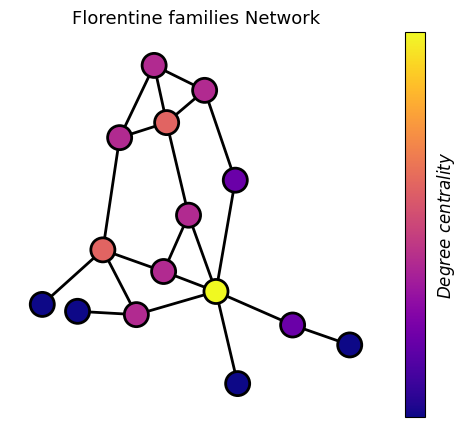

In [21]:
pos = nx.spring_layout(G, iterations=50, seed=0)
fig, axs = plt.subplots(figsize=(6,5), facecolor='w', nrows=1, ncols=1) #, gridspec_kw={'width_ratios': [1.5, 1]})
sc = nx.draw_networkx_nodes(
    G, pos, node_color=degree_centrality, 
    linewidths=2, edgecolors='k', ax=axs, cmap='plasma')
nx.draw_networkx_edges(G, pos, width=2, ax=axs)
axs.axis('off'); axs.set_title("Florentine families Network", fontsize=13)
cbar = plt.colorbar(sc, ax=axs, ticks=[])
cbar.set_label("$Degree\ centrality$", fontsize=12)

### 5.1.2. Closeness centrality

The distance between two nodes $u$ and $v$ ($d(v,u)$) correspond to the amount of edges needed to reach node $u$ from $v$.

The closeness centrality of a node $u$, denoted as $C(u)$, is the reciprocal of the average distance from $u$ to every reachable node.

This can be expressed as follows:

$$
C(u) = \frac{n-1}{\sum_{v=1}^{n-1} d(v,u)}.
$$



In [22]:
closeness_centrality = np.array(list(nx.closeness_centrality(G).values()))
closeness_centrality

array([0.36842105, 0.56      , 0.38888889, 0.36842105, 0.4375    ,
       0.4375    , 0.5       , 0.48275862, 0.48275862, 0.38888889,
       0.28571429, 0.4       , 0.46666667, 0.33333333, 0.3255814 ])

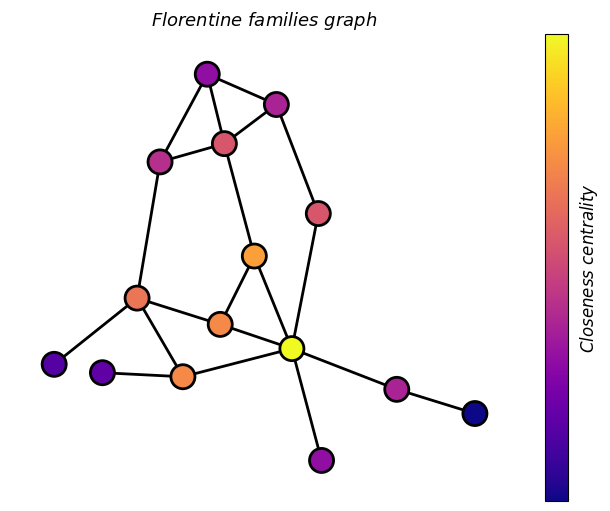

In [23]:
pos = nx.spring_layout(G, iterations=50, seed=0)
fig, axs = plt.subplots(figsize=(6,5), facecolor='w', nrows=1, ncols=1, constrained_layout=True) #, gridspec_kw={'width_ratios': [1.5, 1]})
sc = nx.draw_networkx_nodes(G, pos, node_color=closeness_centrality, linewidths=2, edgecolors='k', ax=axs, cmap='plasma')
nx.draw_networkx_edges(G, pos, width=2, ax=axs)
axs.axis('off')
axs.set_title("$Florentine\ families\ graph$", fontsize=13)
cbar = plt.colorbar(sc, ax=axs, ticks=[])
cbar.set_label("$Closeness\ centrality$", fontsize=12)

### 5.1.3. Betweenness centrality

It defines centrality of a vertex $u$ by considering the fraction of shortest paths that can be taken through $u$. If there is a high number of paths, the more important or influential $u$ is.

It is computed as $B(u) = \sum_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}$, where $V$ is the set of nodes, $\sigma_{s,t}$ is the total number of shortest paths between nodes $s$ and $t$, and $\sigma_{st}(v)$ corresponds to the $\sigma_{st}$ that goes to $v$. 

Thus, it is the sum of the fraction of all-pairs shortest paths that pass through any node in $V$.

In [24]:
betweenness_centrality = np.array(list(nx.betweenness_centrality(G).values()))
betweenness_centrality

array([0.        , 0.52197802, 0.05494505, 0.02197802, 0.1025641 ,
       0.09340659, 0.11355311, 0.09157509, 0.21245421, 0.14285714,
       0.        , 0.1043956 , 0.25457875, 0.        , 0.        ])

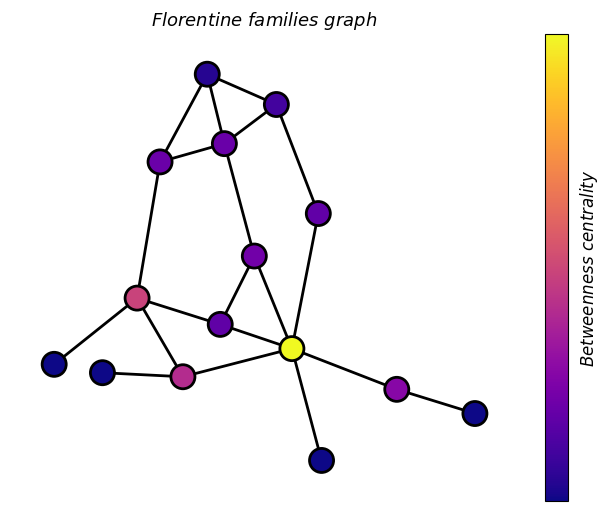

In [25]:
pos = nx.spring_layout(G, iterations=50, seed=0)
fig, axs = plt.subplots(figsize=(6,5), facecolor='w', nrows=1, ncols=1, constrained_layout=True) #, gridspec_kw={'width_ratios': [1.5, 1]})
sc = nx.draw_networkx_nodes(G, pos, node_color=betweenness_centrality, linewidths=2, edgecolors='k', ax=axs, cmap='plasma')
nx.draw_networkx_edges(G, pos, width=2, ax=axs)
axs.axis('off')
axs.set_title("$Florentine\ families\ graph$", fontsize=13)
cbar = plt.colorbar(sc, ax=axs, ticks=[])
cbar.set_label("$Betweenness\ centrality$", fontsize=12)

### 5.1.4. Eigenvector centrality

Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. The eigenvector centrality for node $i$ is the $i$-th element of the vector $x$ defined by the equation $A x = \lambda x$; where $A$ is the adjacency matrix of the graph $G$ with eigenvalue $\lambda$. By virtue of the Perron-Frobenius theorem, there is a unique solution $x$, all of whose entries are positive, if $\lambda$ is the largest eigenvalue of the adjacency matrix $A$.[2,3]

In [26]:
eigenvector_centrality = np.array(list(nx.eigenvector_centrality(G).values()))
eigenvector_centrality

array([0.13215732, 0.43031543, 0.25902004, 0.27572244, 0.35597303,
       0.21170575, 0.34155443, 0.3258467 , 0.24396053, 0.14592084,
       0.04481494, 0.2827944 , 0.28911716, 0.07492453, 0.08879253])

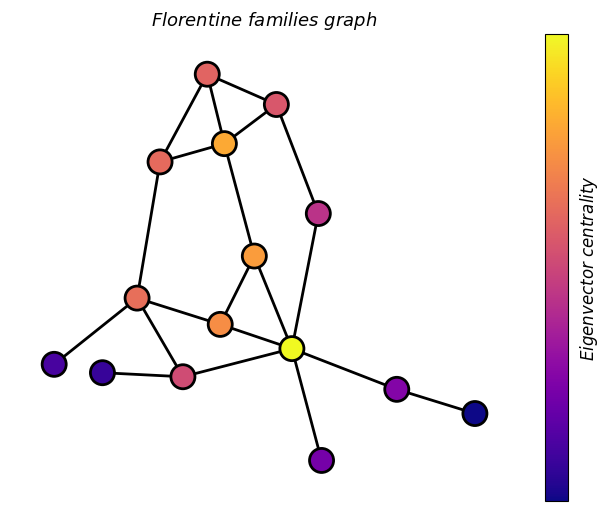

In [27]:
pos = nx.spring_layout(G, iterations=50, seed=0)
fig, axs = plt.subplots(figsize=(6,5), facecolor='w', nrows=1, ncols=1, constrained_layout=True) #, gridspec_kw={'width_ratios': [1.5, 1]})
sc = nx.draw_networkx_nodes(G, pos, node_color=eigenvector_centrality, linewidths=2, edgecolors='k', ax=axs, cmap='plasma')
nx.draw_networkx_edges(G, pos, width=2, ax=axs)
axs.axis('off')
axs.set_title("$Florentine\ families\ graph$", fontsize=13)
cbar = plt.colorbar(sc, ax=axs, ticks=[])
cbar.set_label("$Eigenvector\ centrality$", fontsize=12)

## 5.2. Comparison of centrality measures

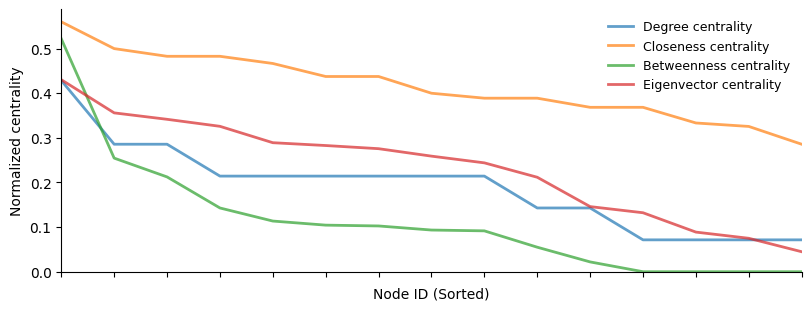

In [28]:
# sorted
lw = 2.0; alpha = 0.7

fig, axs = plt.subplots(figsize=(8, 3), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
axs.plot(np.sort(degree_centrality)[::-1]     , lw=lw, alpha=alpha, label='Degree centrality')
axs.plot(np.sort(closeness_centrality)[::-1]  , lw=lw, alpha=alpha, label='Closeness centrality')
axs.plot(np.sort(betweenness_centrality)[::-1], lw=lw, alpha=alpha, label='Betweenness centrality')
axs.plot(np.sort(eigenvector_centrality)[::-1], lw=lw, alpha=alpha, label='Eigenvector centrality')
axs.legend(frameon=False, fontsize=9, bbox_to_anchor=(1, 1.))
axs.set_xlim([0,14]); axs.set_ylim(bottom=0)
axs.set_xticks(range(15)); axs.set_xticklabels([])
axs.set_ylabel("Normalized centrality")
axs.set_xlabel("Node ID (Sorted)")
axs.spines[['right', 'top']].set_visible(False)

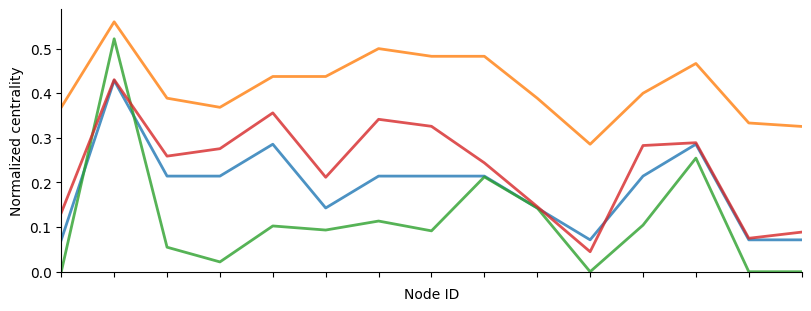

In [29]:
alpha = 0.8; lw=2
fig, axs = plt.subplots(figsize=(8, 3), facecolor='w', nrows=1, ncols=1, constrained_layout=True)
axs.plot(degree_centrality     , lw=lw, alpha=alpha, label='Degree centrality')
axs.plot(closeness_centrality  , lw=lw, alpha=alpha, label='Closeness centrality')
axs.plot(betweenness_centrality, lw=lw, alpha=alpha, label='Betweenness centrality')
axs.plot(eigenvector_centrality, lw=lw, alpha=alpha, label='Eigenvector centrality')
axs.set_xlim([0,14]); axs.set_ylim(bottom=0)
axs.set_xticks(range(15)); axs.set_xticklabels([])
axs.set_ylabel("Normalized centrality")
axs.set_xlabel("Node ID")
axs.spines[['right', 'top']].set_visible(False)

In [30]:
l_centralities = [
    degree_centrality, closeness_centrality, 
    betweenness_centrality, eigenvector_centrality]
l_centrality_names = ['Degree centrality', 'Closeness centrality', 
    'Betweenness centrality', 'Eigenvector centrality']

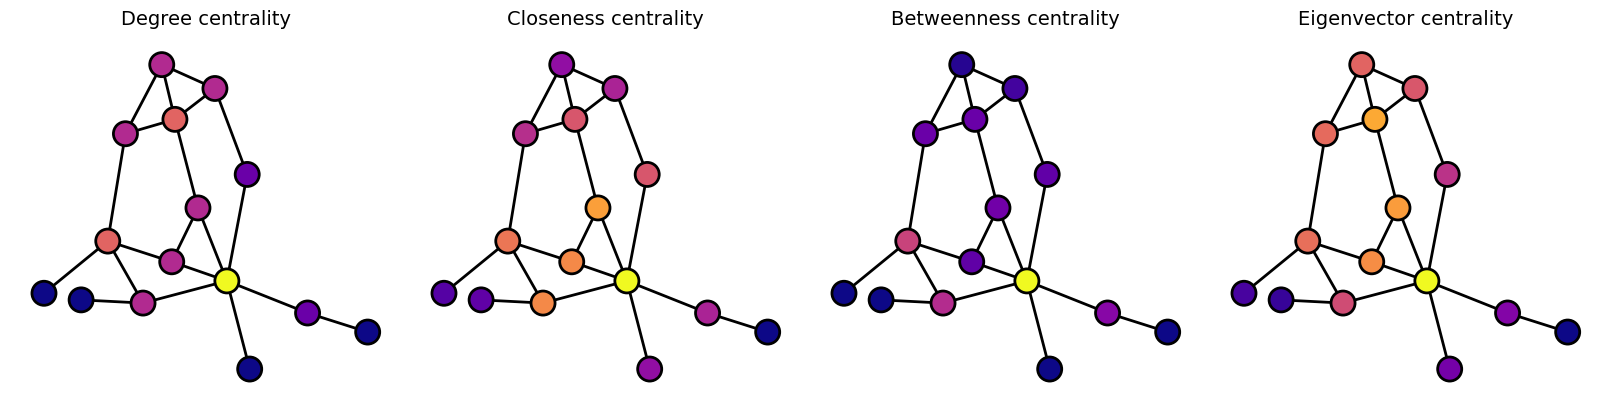

In [31]:
pos = nx.spring_layout(G, iterations=50, seed=0)
fig, axs = plt.subplots(figsize=(4*4,4), facecolor='w', nrows=1, ncols=4, constrained_layout=True) #, gridspec_kw={'width_ratios': [1.5, 1]})

for i in range(len(l_centralities)):
  sc = nx.draw_networkx_nodes(G, pos, node_color=l_centralities[i], linewidths=2, edgecolors='k', ax=axs[i], cmap='plasma')
  nx.draw_networkx_edges(G, pos, width=2, ax=axs[i])
  axs[i].axis('off')
  axs[i].set_title(l_centrality_names[i], fontsize=14)
  #cbar = plt.colorbar(sc, ax=axs[i], ticks=[])
  #cbar.set_label("$Eigenvector\ centrality$", fontsize=12)

Thus, the main differences between these centrality metrics lie in the aspect they capture: 
+ The **Degree centrality** measures the number of connections (and is based on that alone). 
+ The **Closeness centrality** measures the average distance to other nodes. 
+ The **Betweeness centrality** captures the role of the node as an intermediary node.
+ The **Eigen-vector centrality** incorporates both direct centrality (which is the degree) as well as the centrality of its neighbors.

## References

1. Ronald L. Breiger and Philippa E. Pattison Cumulated social roles: The duality of persons and their algebras, 1 Social Networks, Volume 8, Issue 3, September 1986, Pages 215-256
2. Phillip Bonacich. “Power and Centrality: A Family of Measures.” American Journal of Sociology 92(5):1170–1182, 1986. http://www.leonidzhukov.net/hse/2014/socialnetworks/papers/Bonacich-Centrality.pdf.
3. Mark E. J. Newman. Networks: An Introduction. Oxford University Press, USA, 2010, pp. 169.
4. Golbeck, J. (2015). Introduction to social media investigation: A hands-on approach. Syngress.
5. Network X. Degree Centrality. Link: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html.
6. Newman, Mark EJ. "The mathematics of networks." The new palgrave encyclopedia of economics 2.2008 (2008): 1-12.

----